In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [10]:
geodir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/geo/'
os.chdir(geodir)

In [11]:
from bcSim import simFiles
import numpy as np
from matplotlib.mlab import griddata

In [12]:
testdir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/'

noahdir = '/Volumes/Chumba/simspace/noahcube/'  #dir for my version
controldir = '/Volumes/Chumba/simspace/control/' #dir for control (no plating etc.)


In [13]:
testdir + 'config.yaml'

'/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/configNoah.yaml'

In [14]:
noahsims_100keV = simFiles(testdir + 'configNoah.yaml')

Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_0.00ze_0.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_0.00ze_75.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_0.00ze_150.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_0.00ze_225.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_0.00ze_300.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_10.00ze_0.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_10.00ze_75.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_10.00ze_150.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_10.00ze_225.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_10.00ze_300.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/noahcube//BurstCube_100.000keV_20.00ze

In [23]:
sims_control = simFiles(testdir + 'config.yaml')

Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_0.00ze_0.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_0.00ze_75.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_0.00ze_150.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_0.00ze_225.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_0.00ze_300.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_6.43ze_0.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_6.43ze_75.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_6.43ze_150.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_6.43ze_225.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_6.43ze_300.00az.inc1.id1.sim
Loading /Volumes/Chumba/simspace/control//BurstCube_100.000keV_12.86ze_0.00az.inc1.id1

In [24]:
aeffs_plate = noahsims_100keV.calculateAeff()
aeffs_control = sims_control.calculateAeff()

In [25]:
# define grid.
azi = np.linspace(0, 300, 100)
zei = np.linspace(0, 90, 200)

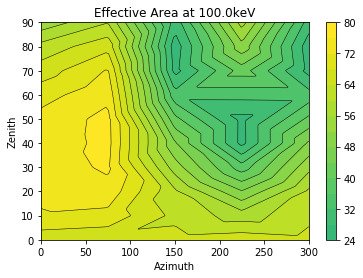

In [26]:
aeffs = aeffs_plate
# grid the data.
aeffi = griddata(aeffs['az'], aeffs['ze'], aeffs['aeff'], azi, zei, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(azi, zei, aeffi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(azi, zei, aeffi, 15,
                  vmax=abs(aeffi).max(), vmin=-abs(aeffi).max())
plt.colorbar()  # draw colorbar
plt.xlabel('Azimuth')
plt.ylabel('Zenith')
plt.title('Effective Area at 100.0keV')
plt.show()

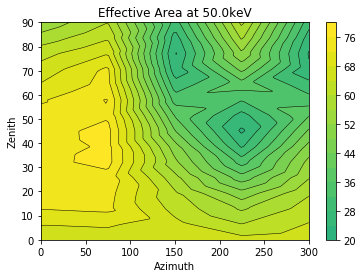

In [27]:
aeffs = aeffs_control
# grid the data.
aeffi = griddata(aeffs['az'], aeffs['ze'], aeffs['aeff'], azi, zei, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(azi, zei, aeffi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(azi, zei, aeffi, 15,
                  vmax=abs(aeffi).max(), vmin=-abs(aeffi).max())
plt.colorbar()  # draw colorbar
plt.xlabel('Azimuth')
plt.ylabel('Zenith')
plt.title('Effective Area at 50.0keV')
plt.show()